# Proyecto - Creditos Bancarios
### Agustina J. Julian - Comisión 61140 - CoderHouse - Data Science
El conjunto de datos "Bank Marketing" de la UCI Machine Learning Repository contiene información sobre campañas de marketing telefónico de una institución bancaria portuguesa. El objetivo es predecir si un cliente suscribirá un depósito a plazo fijo. El dataset incluye 45,211 registros con 17 variables, entre las cuales se encuentran:

- Edad: Edad del cliente.
- Trabajo: Tipo de trabajo del cliente.
- Estado civil: Estado civil del cliente.
- Educación: Nivel de educación del cliente.
- Default: ¿Tiene crédito en incumplimiento?
- Balance: Saldo anual promedio.
- Housing: ¿Tiene préstamo de vivienda?
- Loan: ¿Tiene préstamo personal?
- Contact: Tipo de comunicación de contacto (celular, teléfono fijo).
- Month: Último mes de contacto en el año.
- Day_of_week: Último día de la semana de contacto.
- Duration: Duración del último contacto en segundos.
- Campaign: Número de contactos realizados durante esta campaña.
- Pdays: Número de días desde que el cliente fue contactado por última vez desde una campaña anterior.
- Previous: Número de contactos realizados antes de esta campaña.
- outcome: Resultado de la campaña de marketing anterior.
- Y: Variable objetivo (sí/no para suscripción a un depósito a plazo fijo).

Este conjunto de datos no contiene valores faltantes y está preparado para tareas de clasificación. El objetivo es identificar las características de los clientes que llevan a una mayor tasa de suscripción. A fines academicos, algunas variables van a contener valores Nulos para poder utilizar ciertas herramientas vistas en clase. Algunos datos vienen como unknown en el caso de la variable "educacion" y "trabajo" por lo que las remplaze por NaN para implementar las herramientas vistas durante el curso.

Es una buena base para analizar y mejorar las estrategias de marketing bancario, permitiendo a las instituciones financieras optimizar sus campañas y dirigirse más eficazmente a sus clientes potenciales.

Mi interes personal en este conjunto de datos es porque actualmente me encuentro trabajando en uno de los bancos más importantes de Argentina, en el area de estrategia. Por lo cual es interesante saber si a la hora de buscar nuevas suscripciones a Plazos Fijos tenemos una herramienta que nos oriente con que clientes comenzar dicha campaña.

La fuente de datos es: https://archive.ics.uci.edu/dataset/222/bank+marketing


#### Hipotesis & Preguntas

Antes de comenzar a analizar nuestro conjunto de datos, plantearemos algunas preguntas que creemos que nos pueden agregar información y con mi conocimiento del tema creo que podria esclarecer la orientación de nuestro modelo.

_ Pregunta: ¿Que caracteristica demografica esta relacionada en mayor o menor medida a la suscripcion a un PF? Hipótesis: Los clientes de mayor edad y con un nivel de educación superior tienen una mayor probabilidad de suscribirse a un depósito a plazo fijo.

_Pregunta: ¿Influye el canal de contacto en la probabilidad de suscripción? Hipótesis: Los contactos a través de celular son más efectivos para lograr una suscripción.

_Pregunta: ¿El historial financiero del cliente afecta su decisión de suscribirse a un depósito a plazo fijo? Hipótesis: Los clientes sin préstamos personales o hipotecas tiene menos tasa de suscripción que los que no tienen deudas.

_Pregunta: ¿Cómo impacta el momento del contacto (mes y día de la semana) en la efectividad de la campaña? Hipótesis: Las llamadas realizadas a mediados de semana y en meses específicos como mayo y junio son más exitosas.


#### Analisis y limpieza de DF


In [1]:
#Primero importamos las librerias que vamos a utilizar en el trabajo
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# URL del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/agustinajaz/ProyectoDS_Agustina_Julian/main/bank-full1.csv'

# Leer el archivo CSV desde la URL
df = pd.read_csv(url, sep=';')

# Mostrar las primeras filas del DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,NaN,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,NaN,single,NaN,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Vamos a ver cuantos registros y features tiene nuestro df
print("Nuestro DataFrame tiene", df.shape[0], "registros y ", df.shape[1], "variables a considerar")

Nuestro DataFrame tiene 45211 registros y  17 variables a considerar


In [4]:
#Para hacer un analisis rapido de nuestras variables podemos utilizar este codigo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


En este caso vemos que las variables "Education" y "Job" no estan completas, sino que tienen datos en NaN. Por lo que más adelante realizaremos los cambios pertinentes

Ademas vemos que algunas variables podrian ser categoricas para ser mas eficientes en el almacenamiento y utilizar funciones que en otro formato no funcionarian (Ej: describe)  

Para comenzar a analizar nuestros datos podemos ver cuantos de nuestra base aceptaron y cuantos no

In [5]:
counts = df["y"].value_counts()
print("De los ", len(df.y), "clientes,", counts[1], "aceptaron la suscripción al PF. Mientras que", counts[0], "decidieron no suscribir")

De los  45211 clientes, 5289 aceptaron la suscripción al PF. Mientras que 39922 decidieron no suscribir


In [6]:
counts

y
no     39922
yes     5289
Name: count, dtype: int64

Al ver el formato del dato de la columna Y, considero que es mejor por fines practicos y academicos, convertirlo en 1 para quien haya aceptado y 0 a quien lo rechazo.

In [7]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

In [8]:
df['y'].dtype

dtype('int64')

Como el tipo de dato es int64 vemos que  el impacto fue realizado correctamente. Sino seguiria siendo object.

Ahora comenzaremos a ver la distribucion de las diversas variables que tenemos

In [9]:
df.describe().round(1)

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0
mean,40.9,1362.3,15.8,258.2,2.8,40.2,0.6,0.1
std,10.6,3044.8,8.3,257.5,3.1,100.1,2.3,0.3
min,18.0,-8019.0,1.0,0.0,1.0,-1.0,0.0,0.0
25%,33.0,72.0,8.0,103.0,1.0,-1.0,0.0,0.0
50%,39.0,448.0,16.0,180.0,2.0,-1.0,0.0,0.0
75%,48.0,1428.0,21.0,319.0,3.0,-1.0,0.0,0.0
max,95.0,102127.0,31.0,4918.0,63.0,871.0,275.0,1.0


A primera vista podemos ver que la variable edad los datos son coherentes, nadie excede los 110 años que seria extraño.

En el caso de Balance, podemos asumir que esta bien porque existen personas con valores negativos que podrian ser de deuda y los valores maximos podria ser de una persona con una buena economia. Pero la diferencia con el rango del 75% es considerable. Entonces se trata de una persona que rompe un poco con los valores normales.

La variable DAY, tambien es coherente porque el dia maximo es un dia que esta dentro del calendario

Pdays el numero -1 significa que no fue contactado anteriormente por lo cual es correcto

perviuos quiza el valor maximo es muy alto pero no imposible. Podria analizarse individualmente

In [10]:
#Ahora vamos a analizar si las variables marrital - Category - Job pueden ser convertidas a categoria
cardinalidad = pd.DataFrame({'Cantidad': df.nunique(), 'Porcentaje' : (df.nunique())/(df.shape[0]) * (100)})
cardinalidad

,Cantidad,Porcentaje
age,77,0.170313
job,11,0.024330
marital,3,0.006636
education,3,0.006636
default,2,0.004424
balance,7168,15.854549
housing,2,0.004424
loan,2,0.004424
contact,3,0.006636
day,31,0.068567


Al ver que las varibales maritial, job, education y contact tienen pocos valores posibles podemos transformarla a categorica para optimizar almacenamiento

In [11]:
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['job'] = df['job'].astype('category')
df['contact'] = df['contact'].astype('category')

In [12]:
df.describe(include='category')

,job,marital,education,contact
count,44923,45211,43354,45211
unique,11,3,3,3
top,blue-collar,married,secondary,cellular
freq,9732,27214,23202,29285


En este caso descubrimos que la variable job y education tiene valores nulos. Esto lo detectamos porque vemos que en el count tienen menos valores que las variables contact y marital. Por lo cual antes de seguir con el trabajo trataremos los valores.

Antes de asumir que solo tenemos nulos en estas variables, realizaremos otro chequeo

In [13]:
nulos = pd.DataFrame({'Cantidad' : df.isnull().sum(), 'Porcentaje' : (df.isnull().sum()) / (len(df)) * (100)})
nulos

,Cantidad,Porcentaje
age,0,0.000000
job,288,0.637013
marital,0,0.000000
education,1857,4.107407
default,0,0.000000
balance,0,0.000000
housing,0,0.000000
loan,0,0.000000
contact,0,0.000000
day,0,0.000000


Aca podemos corroborar que solo las variables de educacion y trabajo son las que contienen Nulos y en que porcentaje tienen valores nulos

In [14]:
print("La cantidad de datos nulos en la variable educacion son: ",df.education.isnull().sum(), "y en la variable job son: ",df.job.isnull().sum())

La cantidad de datos nulos en la variable educacion son:  1857 y en la variable job son:  288


Para el caso de estos nulos, como son datos categoricos vamos a remplazarlos por la moda

In [15]:
df['job'].fillna(df['job'].mode()[0], inplace = True)
df['education'].fillna(df['education'].mode()[0], inplace = True)

Vamos a corroborar que los valores Nulos ya quedaron saneados

In [16]:
nan_counts = df.isna().sum()
nan_counts

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Teniendo las variables sin valores nulos, podemos ver su distribucion interna

In [17]:
#Para saber la distribución de las variables que venimos analizando
#y ver su composicion, veremos el porcentaje que tiene cada valor dentro de la variable
(df.job.value_counts(normalize = True)*100).round(1)

job
blue-collar      22.2
management       20.9
technician       16.8
admin.           11.4
services          9.2
retired           5.0
self-employed     3.5
entrepreneur      3.3
unemployed        2.9
housemaid         2.7
student           2.1
Name: proportion, dtype: float64

In [18]:
(df.marital.value_counts(normalize = True)*100).round(1)

marital
married     60.2
single      28.3
divorced    11.5
Name: proportion, dtype: float64

In [19]:
(df.education.value_counts(normalize = True)*100).round(1)

education
secondary    55.4
tertiary     29.4
primary      15.2
Name: proportion, dtype: float64

In [20]:
(df.contact.value_counts(normalize = True)*100).round(1)

contact
cellular     64.8
unknown      28.8
telephone     6.4
Name: proportion, dtype: float64

Ahora vamos a analizar la variable Balance individualmente. Este paso podria omitirse ya que la información estadistica la tenemos más arriba, pero para practicar distintas formas de realizar lo mismo se repetira

In [21]:
promedio = df.balance.mean()
mediana = df.balance.median()
moda = df.balance.mode()

print("Promedio de la variable balance: ", promedio )
print("Mediana de la variable balance: ", mediana )
print("Moda de la variable balance: ", moda)

primer_cuartil = df.balance.quantile(0.25) # Q1 cuartíl 1 --> percentíl 25
tercer_cuartil = df.balance.quantile(0.75) # Q3 cuartíl 2 --> percentíl 75
percentil_99 = df.balance.quantile(0.99) # percentíl 99

print("Primer cuartil: ", primer_cuartil)
print("Tercer cuartil: ", tercer_cuartil)
print("Percentil 99: ", percentil_99)

Promedio de la variable balance:  1362.2720576850766
Mediana de la variable balance:  448.0
Moda de la variable balance:  0    0
Name: balance, dtype: int64
Primer cuartil:  72.0
Tercer cuartil:  1428.0
Percentil 99:  13164.900000000001


En este caso el indicador de la MODA nos da 0 por lo cual nos agrega información para analizar. Quiza ese dato deberia ser un NaN pero el dataset lo trae en 0

In [22]:
cantidad_zeros = (df['balance'] == 0).sum()
print(cantidad_zeros)
#al no ser tanta cantidad sobre el total podemos tomar cierta accion para que dejen de ser 0

3514


In [23]:
#Usaremos la mediana para remplazar los ceros porque la media se ve afectada por los extremos y en este caso es una variable que tiene esos extremos.
##Lo vemos al momento de medir el cuartil 99
# Calcular la mediana de la columna, excluyendo los ceros
#median_income = df['balance'][df['balance'] != 0].median()

# Reemplazar los ceros con la mediana calculada
#df['balance'] = df['balance'].replace(0, median_income)

In [24]:
moda = df.balance.mode()
print("Moda de la variable balance: ", moda)

Moda de la variable balance:  0    0
Name: balance, dtype: int64


Ahora si la moda nos da una valor más razonable

Para seguir analizando esta variable haremos un boxplot y analizar los outliers

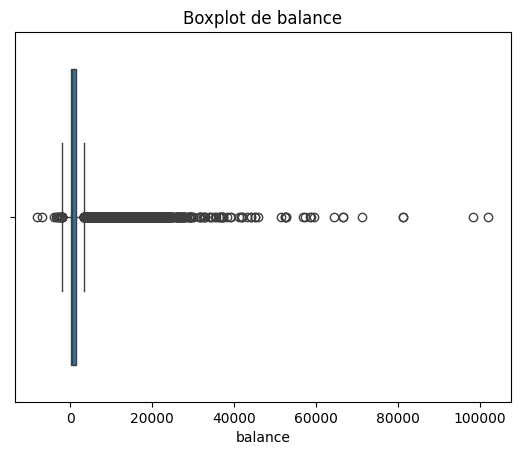

In [25]:
# Suponiendo que quieres hacer un boxplot de la columna 'age'
sns.boxplot(x=df['balance'])

# Agregar título y etiquetas
plt.title('Boxplot de balance')
plt.xlabel('balance')

# Mostrar el gráfico
plt.show()

En este caso vemos que existen valores negativos (ya lo habiamos detectado anteriormente). Podemos intentar hacer un zoom para detectar la cantidad de deudores dentro de nuestro DF

In [26]:
num_negativos = (df['balance'] < 0).sum()

print("Cantidad de clientes deudores segun la variable 'balance':", num_negativos)

Cantidad de clientes deudores segun la variable 'balance': 3766


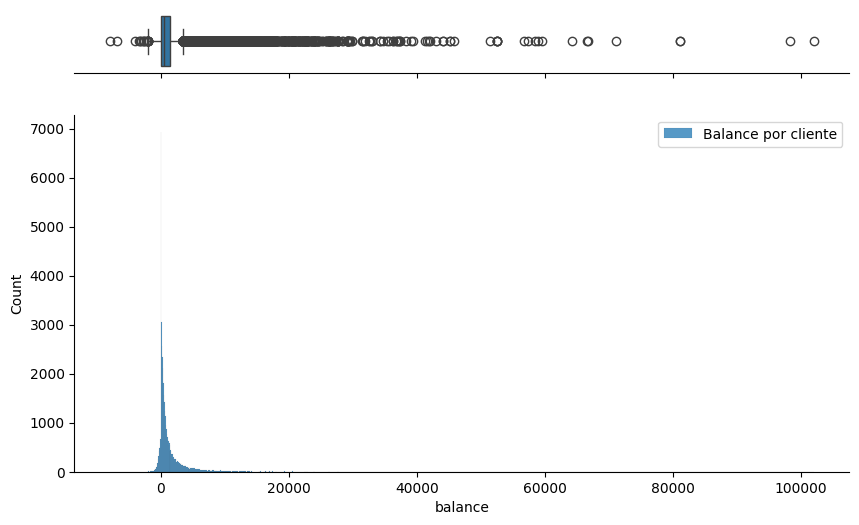

In [27]:
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df['balance'], ax=ax_box, orient="h") # boxplot es diagrama de cajas
sns.histplot(df['balance'], ax=ax_hist, label='Balance por cliente')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

La variable Balance podriamos intentar normalizarla para dejar de lado los valores outliers a la hora de utilizar nuestro modelo. Porque estos valores podrian influir en el mismo de manera negativa

In [28]:
# variable objetivo Adult-->Integer	Number of adults
# Calculamos el z-score
df['balance_z'] = (df['balance'] - df['balance'].mean())/df['balance'].std()
# Creamos una variable para marcar los outliers
df['balance_outliers'] = 0
# Usamos una condicion para marcar los outliers
# tienen que tener un z-score > 3 o <-3
df.loc[(df['balance_z']>3)|(df['balance_z']<-3) , 'balance_outliers'] = 1
# Veamos los resultados
df[['balance', 'balance_z','balance_outliers']]

,balance,balance_z,balance_outliers
0,2143,0.256416,0
1,29,-0.437890,0
2,2,-0.446758,0
3,1506,0.047205,0
4,1,-0.447086,0
...,...,...,...
45206,825,-0.176458,0
45207,1729,0.120445,0
45208,5715,1.429577,0
45209,668,-0.228021,0


Ya realizada la normalización vamos a contar cuantos de estos valores son considerados outliers

In [29]:
df['balance_outliers'].value_counts()

balance_outliers
0    44466
1      745
Name: count, dtype: int64

Lo que haremos ahora es limpiar nuestro conjunto de datos de estos valores outliers.

Aunque es importante aclarar que estos datos outilers no quieren decir que esten mal. Existen personas que pueden estar muy endeudadas o con un balance muy grande. Pero a fines de nuestro modelo, esos valores "ensucian" al modelo.


In [30]:
df_cleaned = df[df['balance_outliers'] != 1]

Corroboramos que el impacto de borrar estas variables outliers fue correcto

In [31]:
#Vamos a ver cuantos registros y features tiene nuestro df
print("Nuestro DataFrame tiene", df_cleaned.shape[0], "registros y ", df_cleaned.shape[1], "variables a considerar")

Nuestro DataFrame tiene 44466 registros y  19 variables a considerar


### Preguntas e Hipotesis

#### Hipotesis & Preguntas



1: ¿Que caracteristica demografica esta relacionada en mayor o menor medida a la suscripcion a un PF? Hipótesis: Los clientes de mayor edad y con un nivel de educación superior tienen una mayor probabilidad de suscribirse a un depósito a plazo fijo.

Para corroborar esta hipotesis, lo que haremos es calcular la tasa de suscripcion a plazo fijo segun el nivel de educación

In [32]:
suscripcion = df.groupby('education')['y'].agg(['sum', 'count'])

# Calcular el porcentaje de conversión
suscripcion['porcentage_conversion'] = (suscripcion['sum'] / suscripcion['count']) * 100

# Mostrar el resultado
print(suscripcion)

            sum  count  porcentage_conversion
education                                    
primary     591   6851               8.626478
secondary  2702  25059              10.782553
tertiary   1996  13301              15.006390


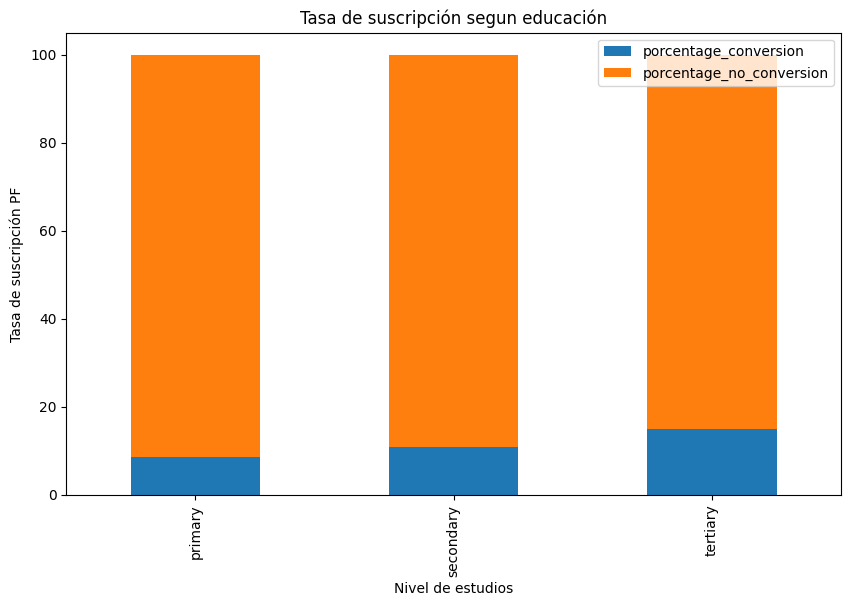

In [33]:
# Calcular el porcentaje de no conversiones
suscripcion['porcentage_no_conversion'] = 100 - suscripcion['porcentage_conversion']

# Preparar datos para el gráfico apilado
suscripcion_data = suscripcion[['porcentage_conversion', 'porcentage_no_conversion']]

# Crear el gráfico apilado
suscripcion_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir etiquetas y título
plt.xlabel('Nivel de estudios')
plt.ylabel('Tasa de suscripción PF')
plt.title('Tasa de suscripción segun educación')

plt.show()

<Figure size 1000x2200 with 0 Axes>

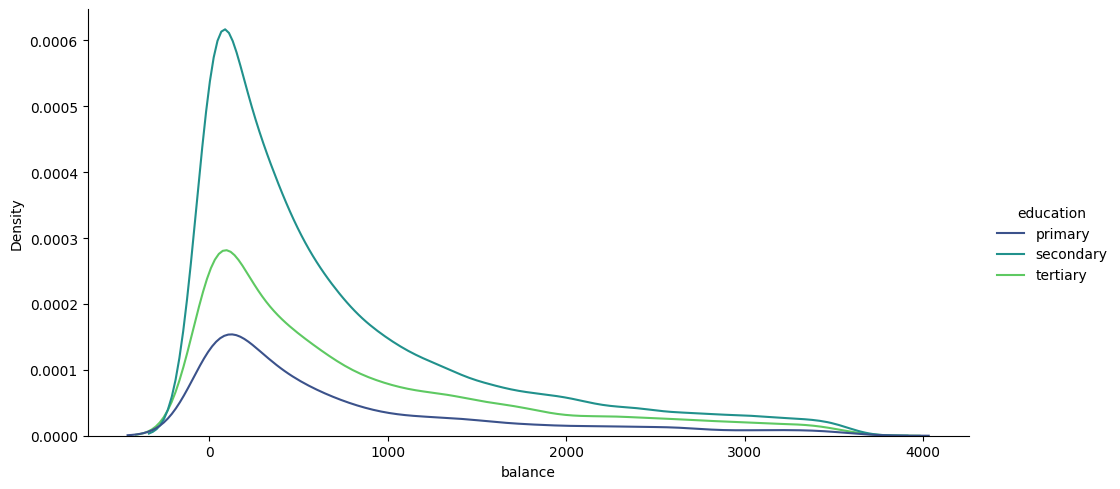

In [34]:
plt.figure(figsize=(10, 22))

# Calcular los percentiles 10 y 90
percentil_10= np.percentile(df['balance'], 10)
percentil_90 = np.percentile(df['balance'], 90)

# Filtrar el DataFrame para incluir solo los valores entre estos percentiles
filtered_df = df[(df['balance'] >= percentil_10) & (df['balance'] <= percentil_90)]

# Crear el gráfico de KDE con los datos filtrados
sns.displot(data=filtered_df, x="balance", hue="education", kind="kde", multiple="layer", palette="viridis",aspect=2)

# Mostrar el gráfico
plt.show()

Lo que podemos ver es que existe una tendencia a que las personas con estudios terciarios suscriban más a los PF. Realizamos la tasa de conversion porque al no tener una distribucion equitativa entre los niveles de estudio, no podremos comparar cantidad. En cambio calcular la tasa de conversion nos muestra que las personas con terciario suscriben mas que los demas. Pero, ninguno supera el 20%

2. Pregunta: ¿Influye el canal de contacto en la probabilidad de suscripción? Hipótesis: Los contactos a través de celular son más efectivos para lograr una suscripción.

In [35]:
contacto = df.groupby('contact')['y'].agg(['sum', 'count'])

# Calcular el porcentaje de conversión/suscripción
contacto['porcentage_conversion'] = (contacto['sum'] / contacto['count']) * 100

# Mostrar el resultado
print(contacto)

            sum  count  porcentage_conversion
contact                                      
cellular   4369  29285              14.918900
telephone   390   2906              13.420509
unknown     530  13020               4.070661


Text(0.5, 1.0, 'Porcentaje de Suscripcion por canal de contacto')

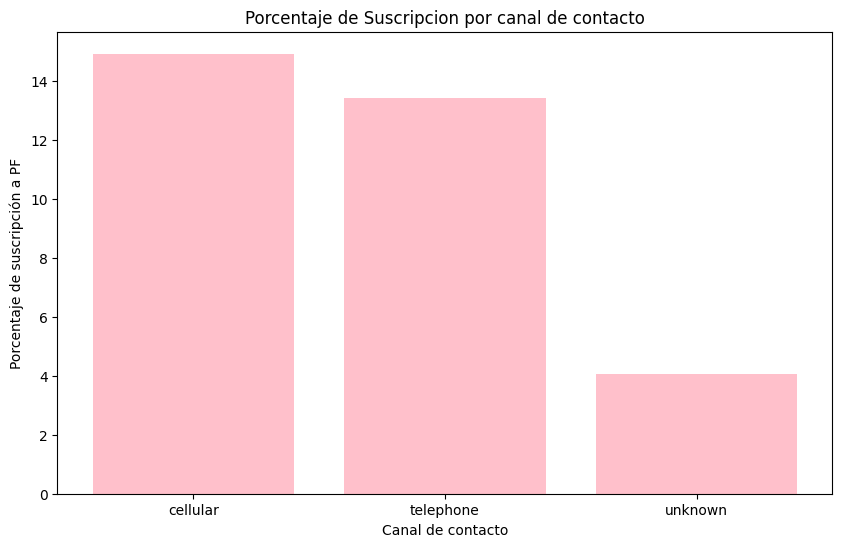

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(contacto.index, contacto['porcentage_conversion'], color='pink')

plt.xlabel('Canal de contacto')
plt.ylabel('Porcentaje de suscripción a PF')
plt.title('Porcentaje de Suscripcion por canal de contacto')

El resultado de este analisis es que los contactos que se realizan por celular tienen una mayor tasa de suscripción a PF. Aunque, nuevamente, ninguno supera el 20% de suscripción

3. Pregunta: ¿El historial financiero del cliente afecta su decisión de suscribirse a un depósito a plazo fijo? Hipótesis: Los clientes sin préstamos personales o hipotecas tiene menos tasa de suscripción que los que no tienen deudas.


En primer lugar, al tenes las dos variables por separado. Lo primero que haremos sera codearla para pasarla a numero y luego generar una nueva variable con la agrupación de estos dos productos bancarios

In [37]:
df_2 = df.copy()
df_2['loan'] = df_2['loan'].replace({'yes': 1, 'no': 0})
df_2['housing'] = df_2['housing'].replace({'yes': 1, 'no': 0})

df_2['pp_hp'] = df_2['loan'] + df_2['housing']

df_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_z,balance_outliers,pp_hp
0,58,management,married,tertiary,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,0.256416,0,1
1,44,technician,single,secondary,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,-0.437890,0,1
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,-0.446758,0,2
3,47,blue-collar,married,secondary,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,0.047205,0,1
4,33,blue-collar,single,secondary,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,-0.447086,0,0


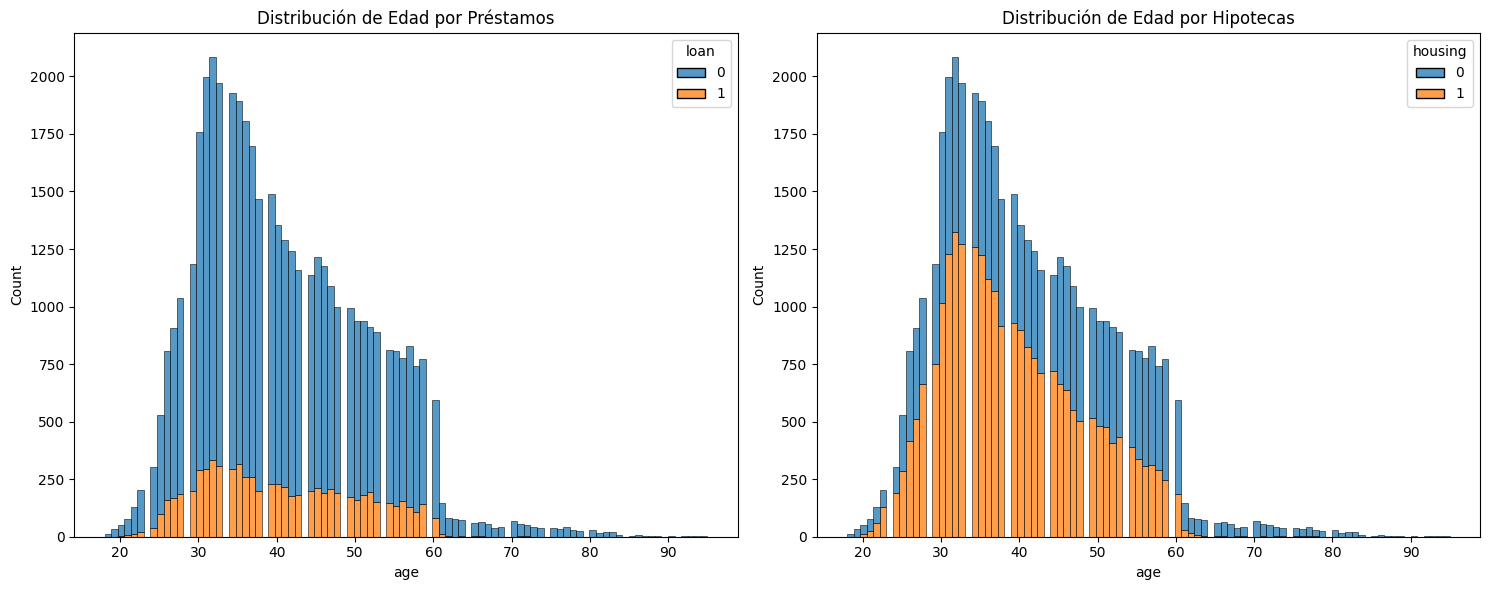

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primer gráfico
sns.histplot(data=df_2, x="age", hue="loan", multiple="stack", ax=axs[0])
axs[0].set_title('Distribución de Edad por Préstamos')

# Segundo gráfico
sns.histplot(data=df_2, x="age", hue="housing", multiple="stack", ax=axs[1])
axs[1].set_title('Distribución de Edad por Hipotecas')

plt.tight_layout()

# Mostrar gráfico
plt.show()


Este grafico nos demuestra que existen muchas mas personas con prestamos hipotecarios que con prestamos personales. Tambien los prestamos hipotecarios tienen una distribucion asimetrica hacia la derecha, mientras que la de prestmos personales es mas flat con una pequena tendencia hacia la izquierda

In [39]:
deudor = df_2.groupby('pp_hp')['y'].agg(['sum', 'count'])

# Calcular el porcentaje de conversión/suscripción
deudor['porcentage_conversion'] = (deudor['sum'] / deudor['count']) * 100

print(deudor)

        sum  count  porcentage_conversion
pp_hp                                    
0      3135  17204              18.222506
1      1889  23640               7.990694
2       265   4367               6.068239


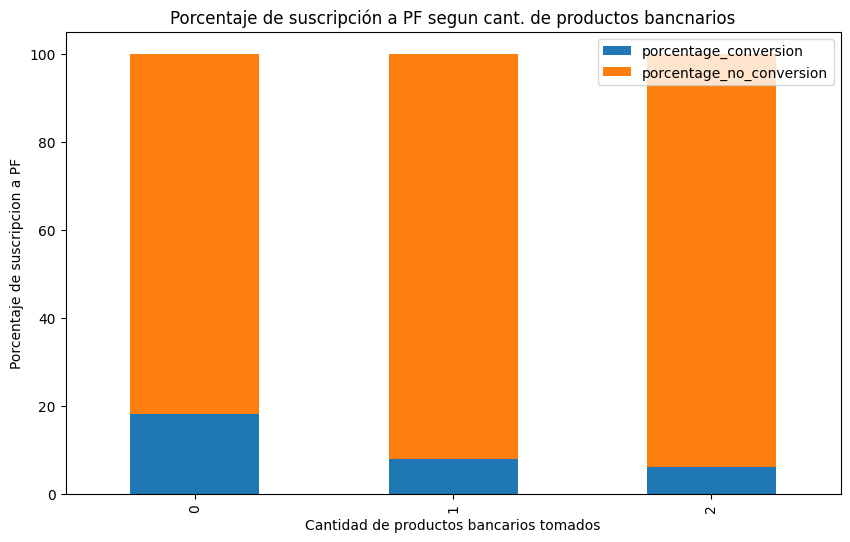

In [40]:
deudor['porcentage_no_conversion'] = 100 - deudor['porcentage_conversion']

deudor_data = deudor[['porcentage_conversion', 'porcentage_no_conversion']]

deudor_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Cantidad de productos bancarios tomados')
plt.ylabel('Porcentaje de suscripcion a PF')
plt.title('Porcentaje de suscripción a PF segun cant. de productos bancnarios')

plt.show()

En este caso vemos que estamos en lo correcto, las personas sin deudas tienden a suscribir más que las que ya cuentan con deudas. La diferencia es bastante notaria respecto a las personas que cuentan con un PP o un PH.

4. Pregunta: ¿Cómo impacta el momento del contacto (mes y día de la semana) en la efectividad de la campaña? Hipótesis: Las llamadas realizadas a mediados de semana y en meses específicos como mayo y junio son más exitosas.

In [41]:
contacto = df.groupby('day')['y'].agg(['sum', 'count'])
contacto['porcentage_conversion'] = (contacto['sum'] / contacto['count']) * 100

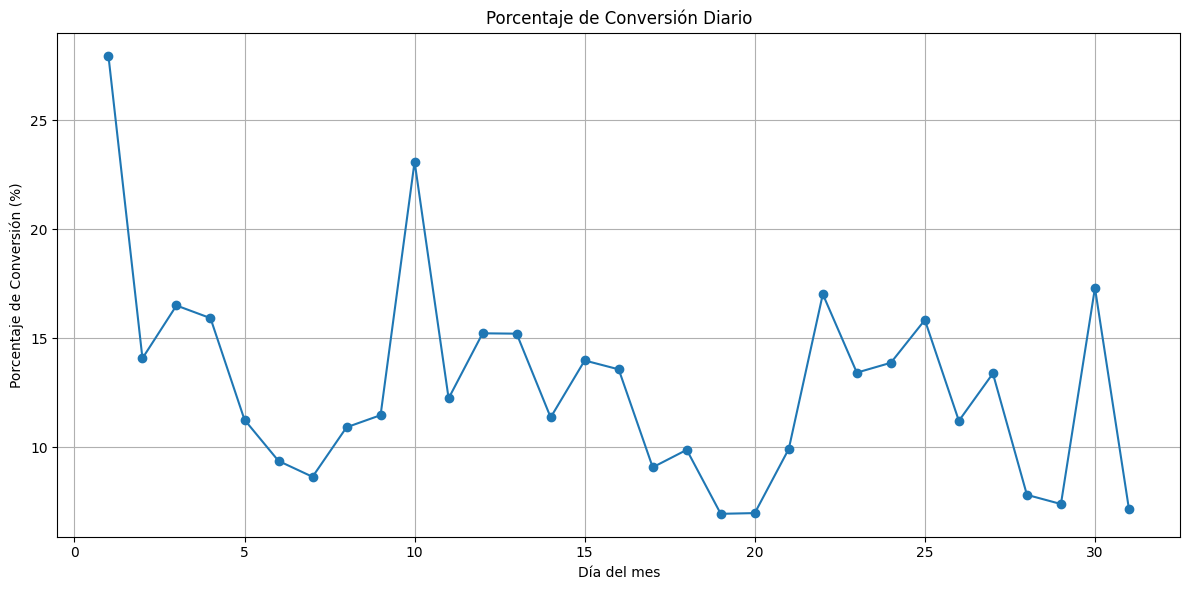

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plotear los datos
ax.plot(contacto.index, contacto['porcentage_conversion'], marker='o', linestyle='-')

# Configurar etiquetas y título
ax.set_xlabel('Día del mes')
ax.set_ylabel('Porcentaje de Conversión (%)')
ax.set_title('Porcentaje de Conversión Diario')

# Añadir una cuadrícula
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Al ver el grafico de los dias con su tasa de suscripcion podemos ver que existen ciertos puntos de mayor conversion que otros. Por ejemplo: los dias a principio de mes o fin de mes parece haber ciertas tendencias, lo cual podria estar alineado al hecho de uno cobra su sueldo y dedica cierta parte del mismo al ahorro

In [43]:
contacto_mes = df.groupby('month')['y'].agg(['sum', 'count'])
contacto_mes['porcentage_conversion'] = (contacto_mes['sum'] / contacto_mes['count']) * 100
contacto_mes = contacto_mes.sort_values(by='porcentage_conversion', ascending=False)

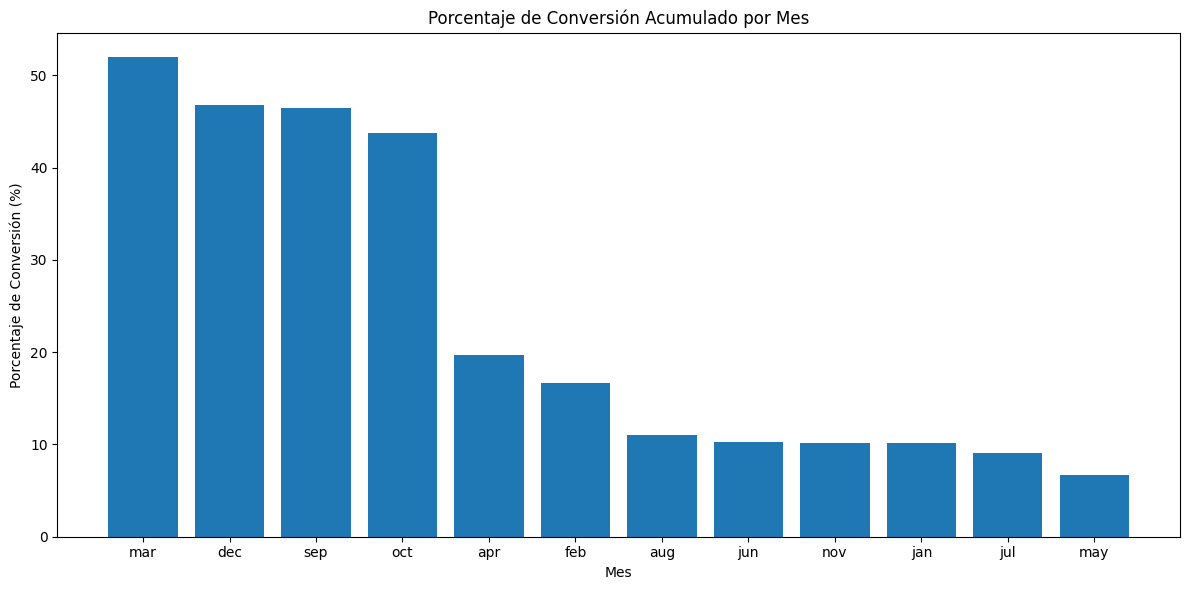

In [44]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Plotear los datos
ax.bar(contacto_mes.index, contacto_mes['porcentage_conversion'])

# Configurar etiquetas y título
ax.set_title('Porcentaje de Conversión Acumulado por Mes')
ax.set_ylabel('Porcentaje de Conversión (%)')
ax.set_xlabel('Mes')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Al verlo de esta manera, pareceria que ciertos meses tienen mas tendencia a tener una mayor tasa de suscripcion, como los meses de marzo, diciembre, septiembre y octubre

#MODELO

In [45]:
 from sklearn.datasets import load_breast_cancer
 from sklearn.datasets import load_diabetes
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import confusion_matrix
 from sklearn import metrics
 import pandas as pd
 import numpy as np
 from matplotlib import pyplot as plt
 import seaborn as sns
 sns.set_style('whitegrid')
 from sklearn.preprocessing import OneHotEncoder

In [46]:
df_encoded = df_cleaned.copy()

Lo que realizamos a continuacion es cambiar algunas variables del DF para que sea más facil de utilizar por el modelo.

Las variables categorias seran transformadas por one hot encoding y label encoding

En este primer caso, las variables tienen pocos valores posibles. Por lo cual utilizaremos el label encoding

In [47]:
df_encoded['marital'] = df['marital'].replace({'married': 1, 'single': 2, 'divorced': 3})
df_encoded['education'] = df['education'].replace({'secondary': 2, 'tertiary': 3, 'primary': 1})
df_encoded['default'] = df['default'].replace({'yes': 1, 'no': 0})
df_encoded['default'] = df['default'].replace({'yes': 1, 'no': 0})
df_encoded['housing'] = df['housing'].replace({'yes': 1, 'no': 0})
df_encoded['loan'] = df['loan'].replace({'yes': 1, 'no': 0})
df_encoded['contact'] = df['contact'].replace({'unknown': 0, 'cellular': 1, 'telephone':2})
df_encoded['poutcome'] = df['poutcome'].replace({'unknown': 0, 'failure': 1, 'other':2, 'success': 3})

In [48]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

# Aplicar el mapeo a la columna 'month'
df_encoded['month'] = df_encoded['month'].map(month_mapping)

Ya realizados estos cambios en las variables categoricas, vamos a seguir con otra variable

Por otro lado, tenemos la variable job que tiene muchos valores posibles. Por lo que para esta feature vamos a utilizar otra estrategia de one-hot

In [49]:
# Primero lo aplicamos a la columna en cuestion
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_encoded[['job']]).toarray()

# Ya encodeada esa columna la pasamos a formato DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['job']))

df_encoded.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenamos nuestro dataframe a nuestra columna encodeada
df_encoded2 = pd.concat([df_encoded.drop('job', axis=1), encoded_df], axis=1)


Corroboramos que todo nuestro DF tenga las columnas encodeadas y listas para ser utilizadas

In [50]:
df_encoded2.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,1,3,0,2143,1,0,0,5,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,2,2,0,29,1,0,0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,33,1,2,0,2,1,1,0,5,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,1,2,0,1506,1,0,0,5,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,2,2,0,1,0,0,0,5,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Primer Modelo

Modelo de Machine Learning
En este caso, como nuestra variable es si o no tendremos que utilzar un modelo de Clasificación Binaria

features = X <br>
target = y

En este caso nuestra variable target es la Y
mientras que nuestras features vamos a todas las demas variables

Ahora comenzaremos a armar nuestras variables a utilizar en el modelo.

Por un lugar tendremos todas las variables de nuestro conjunto sin la variable 'y', ya que esta es el resultado real del contacto. Y sin la variable 'Duration' porque tiene una relacion directa con el resultado del contacto. Probablemente si acepta la suscripcion se quede mas tiempo en la llamada que si lo rechaza
Tambien las columnas balance_z y balance_outilers las dejaremos de lado porque con tener la variable normalizada, ya esta bien

In [51]:
excluded_columns = ['y', 'duration', 'balance_z', 'balance_outliers']
columns = [col for col in df_encoded2.columns if col not in excluded_columns]

X = df_encoded2[columns]
y = pd.Series(df_encoded2['y'])

Antes de comenzar con nuestro modelo de claificación binaria, determinamos que tan balanceado esta nuestro DF para luego utilizar las metricas correspondientes

In [52]:
y.value_counts(normalize=True).round(2)*100

y
0    88.0
1    12.0
Name: proportion, dtype: float64

En este caso vemos que nuestro DF no esta balanceado desde el origen. Por lo cual el Accuracy estaria mal utilizarlo sobre este conjunto de datos. Probablemente utilizaremos indicadores como Precision, Recall y F1

Comenzando con el primer modelo, generarenmos un subconjunto de datos que sea de testeo y otro de entrenamiento

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [54]:
# Creamos un KNN
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)
preds_train = modelo.predict(X_train)

Ya teniendo nuestras predicciones realizadas por nuestro modelo, crearemos la matriz de confusion para entender como esta funcionando el modelo contra el valor verdadero de nuestra base.

In [56]:
# Creando la matriz de confusión
cm = confusion_matrix(y_test, preds)
cm

array([[7600,  310],
       [ 838,  146]])

In [57]:
# Creando la matriz de confusión
cm2 = confusion_matrix(y_train, preds_train)
cm2

array([[30929,   459],
       [ 2765,  1419]])

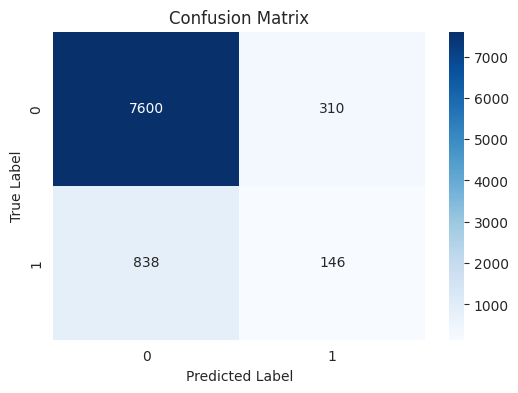

In [58]:
# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Si suscribio PF
#Clase 0: No suscribio PF

Con nuestra matriz comenzaremos a calcular nuestras metricas

## Metricas del Modelo

## Precision

In [59]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa

(0.3201754385964912, 0.9006873666745674)

Este resultado quiere decir que nuestro modelo puede predecir el 33% de las instancias positivas

## Recall

Es la proporción de ejemplos positivos que fueron identificados como tal.

El recall proporciona información sobre la capacidad del modelo para detectar correctamente los casos positivos en una clase específica

recall parte de la realidad, y después evalúa que tan bueno es el modelo para reconocerla.

In [60]:
metrics.recall_score(y_test, preds, pos_label=1), metrics.recall_score(y_test, preds, pos_label=0)

(0.1483739837398374, 0.9608091024020228)

Esto indica que el modelo está capturando aproximadamente el 14.84% de las verdaderas instancias positivas
Esto sugiere que nuestro modelo está perdiendo muchas instancias positivas, lo que puede ser problemático si tu objetivo principal es identificar correctamente todas o la mayoría de las instancias positivas.

A su vez, el modelo está capturando aproximadamente el 96.08% de las verdaderas instancias negativas. Esta haciendo un buen trabajo al identificar correctamente las instancias negativas.

## F1

Es el promedio armónico del precision y el recall. Su ventaja principal es que resume ambas métricas en un único valor.

F1 alcanza su máximo en 1, y su mínimo en 0, donde el primer valor simboliza un modelo infalible (un ideal imposible), y 0 significa que el algoritmo falla todo el tiempo (lamentable).

In [61]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo

(0.20277777777777778, 0.9297773427942255)

In [62]:
#probemos en train

preds_train = modelo.predict(X_train)
f1_positivo = metrics.f1_score(y_train, preds_train, pos_label=1)
f1_negativo = metrics.f1_score(y_train, preds_train, pos_label=0)
f1_positivo, f1_negativo


(0.4681623226657868, 0.9504624934697767)

In [63]:
# Todas las metricas en un solo resumen
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     31388
           1       0.76      0.34      0.47      4184

    accuracy                           0.91     35572
   macro avg       0.84      0.66      0.71     35572
weighted avg       0.90      0.91      0.89     35572



In [64]:
# Todas las metricas en un solo resumen
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7910
           1       0.32      0.15      0.20       984

    accuracy                           0.87      8894
   macro avg       0.61      0.55      0.57      8894
weighted avg       0.84      0.87      0.85      8894



En resumen, las diferencias entre las métricas de entrenamiento y prueba indican cómo bien el modelo puede generalizar a nuevos datos. Un modelo ideal debería mostrar métricas similares entre ambos conjuntos, lo que indica que ha aprendido patrones que se aplican de manera efectiva a datos no vistos anteriormente. Esto quiere decir que tenemos ciertos problemas en nuestros subconjuntos que deberiamos analizar

## Segundo Modelo

La idea es probar las metricas son varios modelos y llegar a la conclusion de cual es el mejor modelo en terminos de INDICADORES

In [65]:
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

In [66]:
X2 = df_encoded2[['balance', 'age']]
Y2 = df_encoded2['y'].values

Nuestra variable Y ya esta en binario y ya esta declarada por el modelo anterior. Por lo que utilizaremos esa misma

In [67]:
# Paso 1
# Importar las librerias del modelo
from sklearn.linear_model import LogisticRegression

# Paso 2
# Crear la instancia del modelo
clf = LogisticRegression()

# Paso 3
# Entrenar el modelo con los datos y la etiqueta
clf.fit(X2, Y2)

LogisticRegression()

In [68]:
X3= X2.values
Y3=Y2

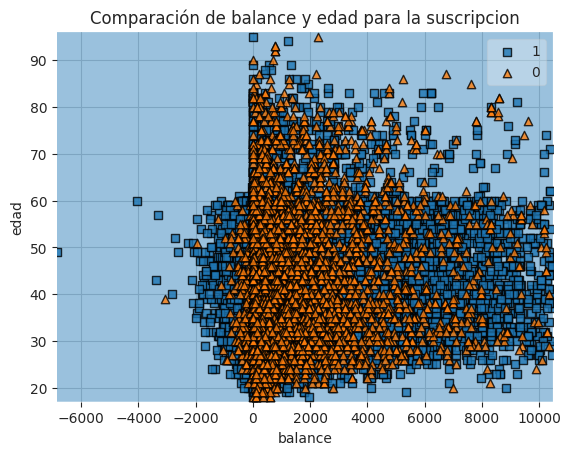

In [69]:

# revisar https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#plot_decision_regions-visualize-the-decision-regions-of-a-classifier
ax=plot_decision_regions(X3, Y3, clf=clf)# Añadir anotaciones

plt.xlabel('balance')
plt.ylabel('edad')
plt.title('Comparación de balance y edad para la suscripcion')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['1', '0'],
           framealpha=0.3, scatterpoints=1)
plt.show()

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Suponiendo que ya has entrenado tu modelo clf con X2 y Y2 como lo mostraste anteriormente

# Predicciones con los datos de entrenamiento
y_pred = clf.predict(X2)

# Calcular métricas
precision = precision_score(Y2, y_pred)
recall = recall_score(Y2, y_pred)
f1 = f1_score(Y2, y_pred)
conf_matrix = confusion_matrix(Y2, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Confusion Matrix:
[[39298     0]
 [ 5168     0]]


Las metricas de este modelo nos dicen que no sirve para nada. No logra diferenciar entre quien suscribe y quien no. Por el momento el mejor modelo es el primer modelo es el mejor

## Tercer Modelo

Al no obtener resultados importantes utilizando estas variables, iremos por otro metodo que utiliza más variables para la toma de prediccion

In [73]:
# Importar las librerias del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [74]:
# Entrenar el modelo con los datos y la etiqueta
excluded_columns = ['y', 'duration', 'balance_z', 'balance_outliers']
columns = [col for col in df_encoded2.columns if col not in excluded_columns]

X = df_encoded2[columns]
y = pd.Series(df_encoded2['y'])

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, X_test son las características (variables independientes) para entrenamiento y prueba respectivamente
# y_train, y_test son las etiquetas (variable dependiente) para entrenamiento y prueba respectivamente

In [75]:
# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [76]:
y_train2 = y_train.replace({1: 'Suscribe', 0: 'No Suscribe'})

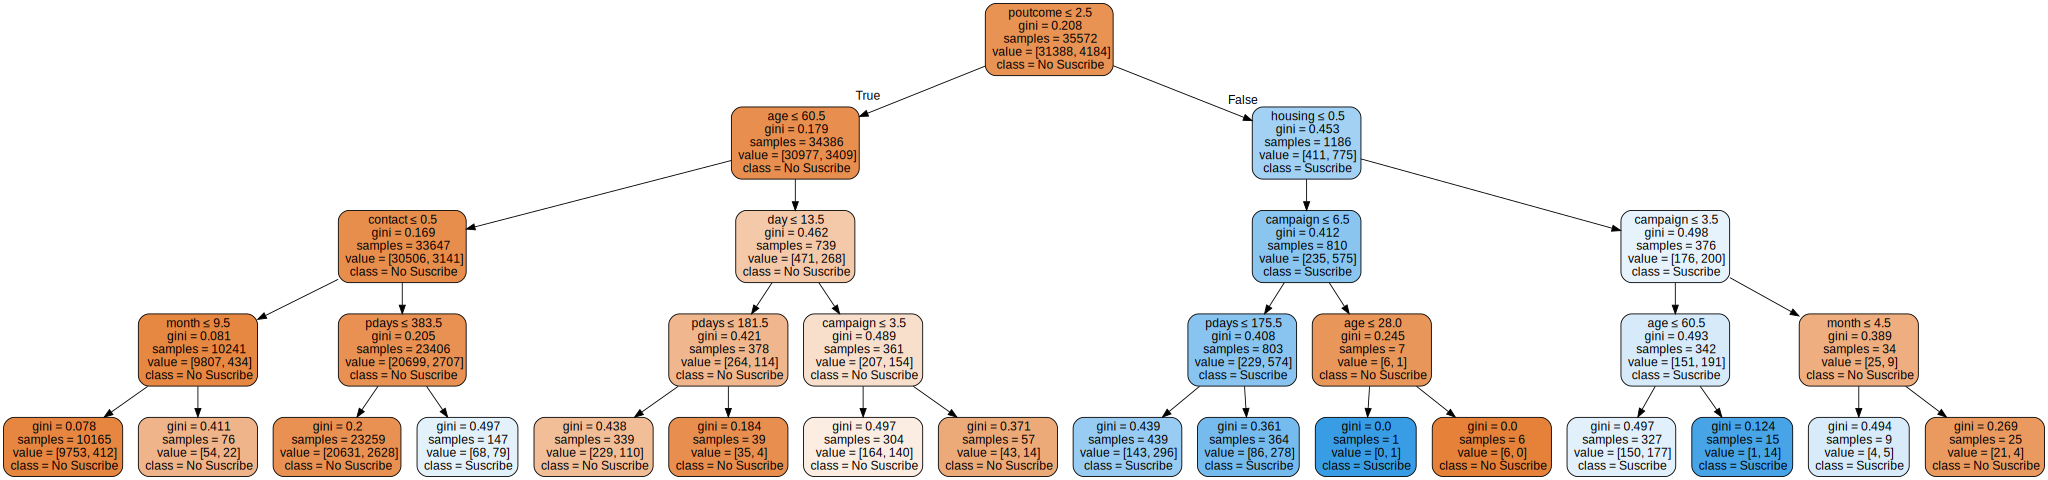

In [77]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import display
# Generate the dot data
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X_train.columns,
                           class_names=y_train2.unique(),
                           filled=True, rounded=True,
                           special_characters=True)

# Create the graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph
display(graph)

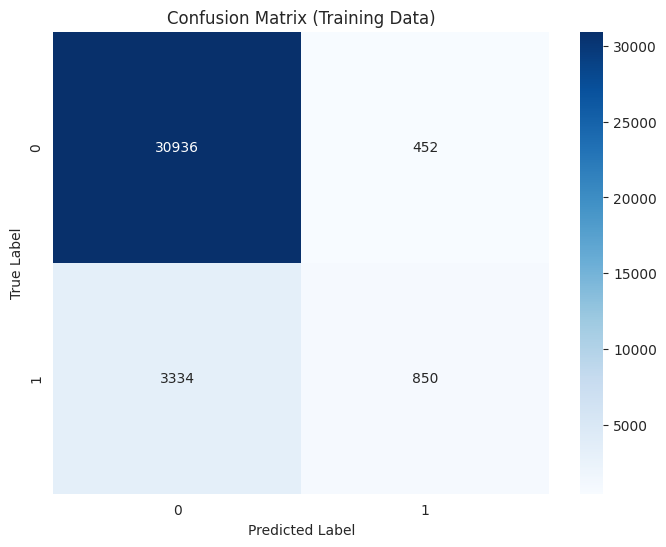

In [78]:
# Predecir en los datos de entrenamiento
y_train_pred = clf.predict(X_train)

# Calcular la matriz de confusión para los datos de entrenamiento
cm_train = confusion_matrix(y_train, y_train_pred)

# Crear una gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Training Data)')
plt.show()

In [79]:
# Predecir en los datos de entrenamiento
y_train_pred = clf.predict(X_train)

# Calcular la matriz de confusión para los datos de entrenamiento
cm_train = confusion_matrix(y_train, y_train_pred)
print("Matriz de Confusión (Entrenamiento):")
print(cm_train)

Matriz de Confusión (Entrenamiento):
[[30936   452]
 [ 3334   850]]


In [80]:
# Calcular precisión, recall y f1-score para los datos de entrenamiento
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print("Métricas de Entrenamiento:")
print(f"Precisión: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1-score: {f1_train:.2f}")

# Predecir en los datos de prueba (si es necesario)
y_test_pred = clf.predict(X_test)  # Asumiendo que tienes datos de prueba (X_test, y_test)

# Calcular precisión, recall y f1-score para los datos de prueba
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nMétricas de Testeo:")
print(f"Precisión: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1-score: {f1_test:.2f}")

Métricas de Entrenamiento:
Precisión: 0.65
Recall: 0.20
F1-score: 0.31

Métricas de Testeo:
Precisión: 0.62
Recall: 0.19
F1-score: 0.29


In [81]:
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     31388
           1       0.65      0.20      0.31      4184

    accuracy                           0.89     35572
   macro avg       0.78      0.59      0.63     35572
weighted avg       0.87      0.89      0.87     35572



In [82]:
# Todas las metricas en un solo resumen
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7910
           1       0.62      0.19      0.29       984

    accuracy                           0.90      8894
   macro avg       0.76      0.59      0.62      8894
weighted avg       0.88      0.90      0.87      8894



#Conclusiones

En este trabajo se utilizaron 3 tipos de modelos. De los cuales, el primero y el tercero son los que dan resultados interesantes.  
Por lo cual, vamos a comprarlos para determinar cual es mejor segun distintas metricas.

Las metricas que vamos a comprar son las que resultan de la prediccion en el caso del testeo. Ya que estos datos no han sido utilizados por el modelo para aprender

**Modelo 1:**

- Precisión (clase 1): 0.32
- Recall (clase 1): 0.15
- F1-score (clase 1): 0.20

**Modelo 2:**

- Precisión (clase 1): 0.62
- Recall (clase 1): 0.19
- F1-score (clase 1): 0.29

***Análisis:***

Precisión y Recall para la clase 1:

Modelo 1 tiene una precisión de 0.32 y un recall de 0.15 para la clase 1.
Modelo 2 tiene una precisión de 0.62 y un recall de 0.19 para la clase 1.
En términos de precisión, el Modelo 2 es mejor (0.32 vs 0.62). Además, el Modelo 1 también tiene un recall más alto (0.15 vs 0.19). Esto sugiere que el Modelo 2 es más preciso y capaz de identificar mejor los casos positivos en comparación con el Modelo 1.

F1-score para la clase 1:

El F1-score combina precisión y recall en una métrica balanceada.
Modelo 1 tiene un F1-score de 0.20.
Modelo 2 tiene un F1-score de 0.29.
El Modelo 2 también supera al Modelo 1 en términos de F1-score lo que confirma que tiene un mejor equilibrio entre precisión y recall para esa clase.

**Conclusión:**
Basado en las métricas de precisión, recall y F1-score el Modelo 2 muestra un desempeño general superior al Modelo 1. Específicamente, el Modelo 2 tiene una mejor capacidad para predecir con una precisión y recall más altos, así como un F1-score más alto.  Por lo tanto, el Modelo 2 sería preferible entre los 3 modelos evaluados.